<a href="https://colab.research.google.com/github/claradelboni/Obesity_MVP/blob/main/Faixas_de_Peso_Indiv%C3%ADduos_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MVP: Análise exploratória e pré-processamento de dados de faixas de peso de indivíduos**

## Sumário



1.   Introdução do dataset e definição do problema
2.   Dicionário dos atributos do dataset
3.   Coleta e análise de dados
4.   Pré-processamento




## Introdução do dataset e definição do problema

Segundo o site da Rede D'or, obesidade é uma condição médica causada pelo acúmulo de gordura localizada em diferentes partes do corpo humano. Apesar do consumo exagerado de calorias proveniente de alimentos ser uma de suas principais causas, há uma variedade de outros fatores que podem estar relacionados a ela. Refletindo sobre o outro extremo, o peso insuficiente pode estar associado a alguma doença que dificulta a ingestão ou absorção de alimentos, e entre outras condições, como a relação com a comida, problemas de saúde mental e tabagismo. A fim de investigar sobre alguns destes fatores, o
dataset utilizado neste projeto inclui dados para estimar níveis de peso em indivíduos do México, Peru e Colômbia, com base em seus hábitos e condições físicas. Ele apresenta atributos que estão associados aos 03 tipos de obesidade: obesidade grau 1: IMC entre 30 - 34,9 kg/m²; obesidade grau= 2: IMC entre 35 - 39,9 kg/mº; obesidade grau 3 (mórbida): IMC >= 40 Kg/m², além de listar indvíduos com 02 níveis de sobrepeso, peso normal e abaixo do peso. O objetivo deste projeto é desenvolver a análise exploratória para visualizar e entender as dependências entre as variáveis, verificando se as correlações fortes, ou não, já eram esperadas, e o pré-processamento dos dados, de forma a verificar a necessidade de tratá-los e transformá-los, preparando-os para que seja possível, em outro momento, utilizar um algoritmo que identifique o subconjunto de atributos que mais se relaciona com a variável de saída. Dessa forma, será possível classificar o tipo de peso dos indivíduos, como por exemplo, algum tipo de obesidade, já que é uma condição que atinge 1 a 4 adultos apenas no Brasil (Minitério da Saúde, 2024) e possui diversas consequências para a saúde física e psicológica. Os insights deste problema supervisionado são frutos dos conhecimentos adquiridos com a Sprint "Análise de Dados e Boas Práticas".

## Dicionário dos atributos do dataset

**Gender**: "Gênero"

**Age** : "Idade"

**Height**: "Altura"

**Weight**: "Peso

**family_history_with_overweight**: "Algum membro da família sofreu ou sofre de excesso de peso?"

**FAVC**: Feature, Binary, "Você consome alimento calóricos frequentemente?"

**FCVC**: Feature, Integer, "Você, geralmente, come vegetais em suas refeições"

**NCP**: Feature, Continuous, "Quantas refeições você faz ao dia?"

**CAEC**: Feature, Categorical, "Você come algum alimento entre as refeições?"

**SMOKE**: Feature, Binary, "Você fuma?"

**CH2O**: Feature, Continuous, "Quanta água você bebe diariamente?"

**SCC**: Feature, Binary, "Você monitora as calorias que ingere diariamente?"

**FAF**: Feature, Continuous, "Com que frequência você pratica atividade física"

**TUE**: Feature, Integer, "Quanto tempo você gasta ao dia utilizando dispositivos tecnológicos como celular, videogame, televisão, computador e outros?"

**CALC** : Feature, Categorical, "Com que frequência você bebe álcool?"

**MTRANS** : Feature, Categorical, "Qual transporte você costuma usar?"

**NObeyesdad**: Target, Categorical, "Tipo de peso"

In [123]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from sklearn import metrics

# Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder,PowerTransformer


### Coleta e análise de dados

In [124]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/claradelboni/Obesity_MVP/main/ObesityDataSet_raw_and_data_sinthetic.csv"

dataset = pd.read_csv(url, delimiter=',')

In [125]:
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [126]:
# Alterando o nome das colunas para entendimento mais claro
dataset = dataset.rename(columns={'CALC': 'Alcohol', 'FAVC': 'Caloric_food', 'FCVC': 'Vegetables', 'NCP': 'Meals_day', 'SCC': 'Monitor_calories', 'FAF': 'Fisical_activity', 'TUE': 'Time_tech', 'CAEC': 'Food_between_meals', 'MTRANS': 'Transportation'})

In [127]:
dataset.tail()

,Age,Gender,Height,Weight,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [128]:
# O dataset possui 2087 linhas e 17 colunas
dataset.shape

(2111, 17)

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   Alcohol                         2111 non-null   object 
 5   Caloric_food                    2111 non-null   object 
 6   Vegetables                      2111 non-null   float64
 7   Meals_day                       2111 non-null   float64
 8   Monitor_calories                2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  Fisical_activity                21

In [130]:
#  Verificando se há nulos
dataset.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
Alcohol,0
Caloric_food,0
Vegetables,0
Meals_day,0
Monitor_calories,0
SMOKE,0


In [131]:
# Verificando valores únicos
dataset.nunique()

,0
Age,1402
Gender,2
Height,1574
Weight,1525
Alcohol,4
Caloric_food,2
Vegetables,810
Meals_day,635
Monitor_calories,2
SMOKE,2


In [132]:
# Visualizando a distribuição de dados das colunas categóricas
dataset.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Gender,2111,2,Male,1068
Alcohol,2111,4,Sometimes,1401
Caloric_food,2111,2,yes,1866
Monitor_calories,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2111,2,yes,1726
Food_between_meals,2111,4,Sometimes,1765
Transportation,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


Na tabela acima, podemos visualizar que o *target*, "NObeyesdad", possui 7 classes. Além disso, o conjunto de dados está balanceado em relação ao genêro e a maioria respondeu que não monitora as calorias durante o dia e não fuma.

In [133]:
# Visualizando as estatísticas das colunas numéricas que a função describe() fornece
dataset.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
Vegetables,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
Meals_day,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
Fisical_activity,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
Time_tech,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Com a tabela acima, é possível identificar as médias das variáveis numéricas, os desvios-padrão e os valores mínimos e máximos. A média de peso já indica um valor consideravelmente alto, podendo significar que o conjunto de dados possui mais pessoas com sobrepeso e obesas.

In [134]:
target_unique = dataset['NObeyesdad'].unique()
target_unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

O target "NObeyesdad" possui 7 classes: Peso insuficiente, Peso normal, Sobrepeso nível 1, Sobrepeso nível 2, Obesidade tipo 1, Obesidade tipo 2 e Obesidade tipo 3.

In [135]:
pd.DataFrame(dataset.NObeyesdad.value_counts())

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


Acima, é possível verificar que o target está balanceado.

In [136]:
dataset.groupby(['Gender']).max().sort_values(by='Gender', ascending=False)

,Age,Height,Weight,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Male,56.0,1.980000,173.000000,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II
Female,61.0,1.843419,165.057269,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II


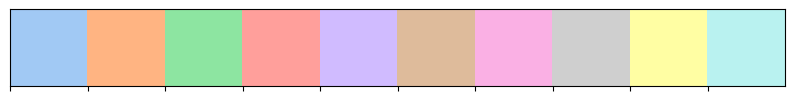

In [137]:
palette = sns.color_palette("pastel")
sns.palplot(palette)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

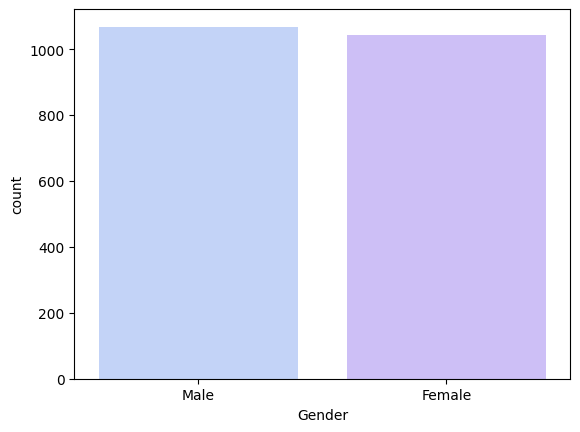

In [138]:
# Visualizações
palette =["#bbd0ff", "#c8b6ff"]
conte_genero = dataset['Gender'].value_counts()
sns.barplot(x = conte_genero.index, y = conte_genero, palette=palette)


Com o gráfico de colunas, a visualização do balanceamento do atributo de gênero fica ainda mais claro.

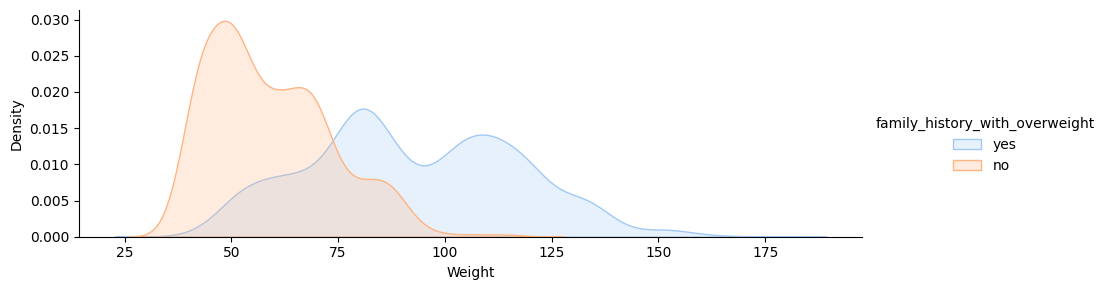

In [139]:
# Curva de densidade do peso, separada por pessoas que possuem e não possuem histórico familiar de sobrepeso.
facet = sns.FacetGrid(dataset, hue="family_history_with_overweight",aspect=3)
facet.map(sns.kdeplot,'Weight',shade= True)
facet.add_legend()
plt.show()

O atributo relacionado a histórico de sobrepeso na família pode ter um alto grau de correlação com o target, pois conforme o gráfico acima demonstra, uma grande parte das pessoas com os maiores pesos responderam "sim", e as mais leves, "não". Isto era esperado, pois a genética e os hábitos, que podem estar atrelados ao convívio com a família, são alguns dos fatores relacionados a obesidade, sobrepeso e peso insuficiente.

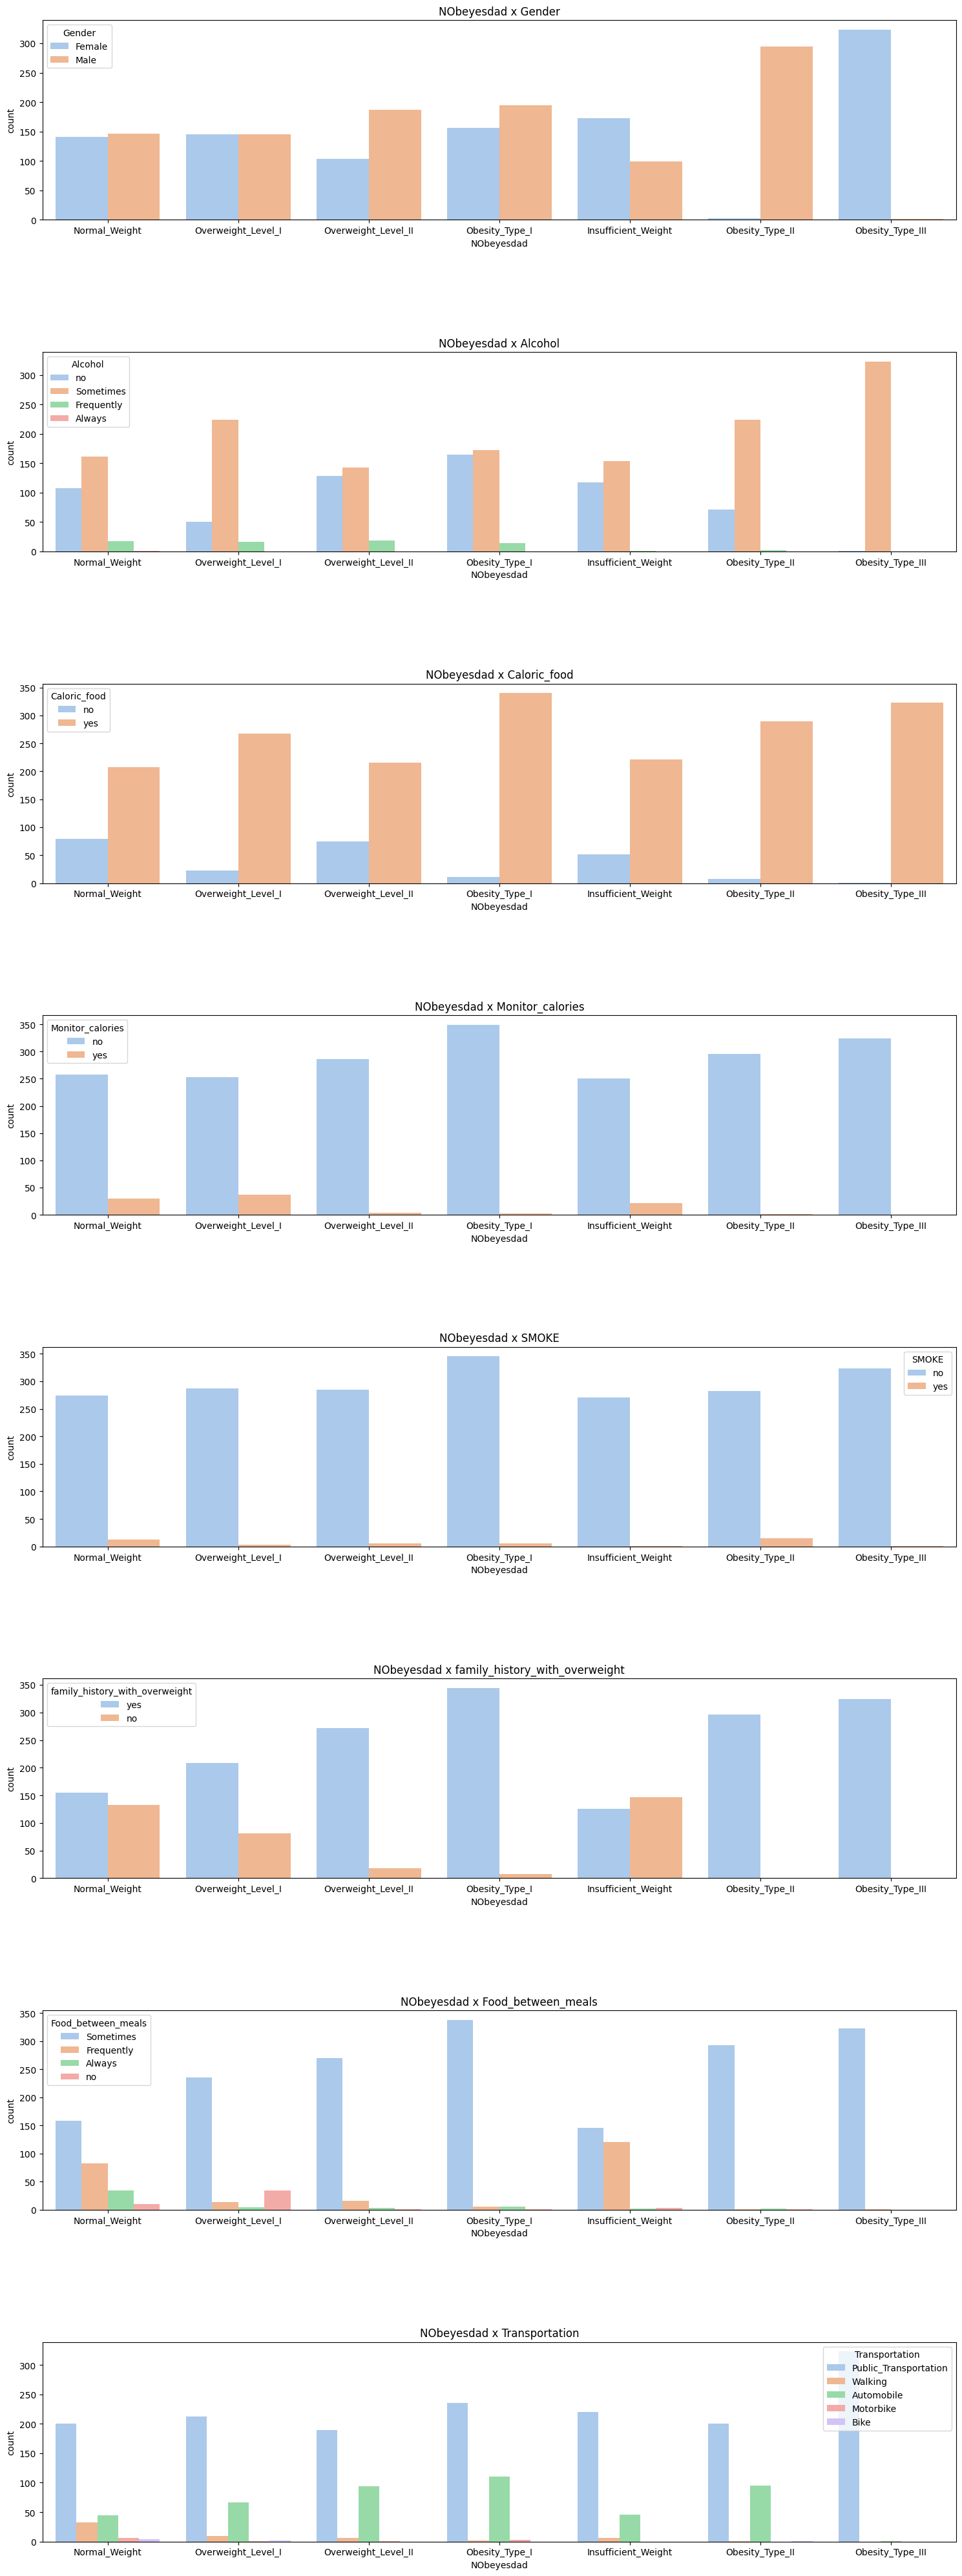

In [140]:
# Agora, para garantir uma melhor visualiazação, criarei gráficos de barras relacionando as variáveis categóricas com o target "NObeyesdad".

sns.set_palette('pastel')
set_cols = ['Gender', 'Alcohol', 'Caloric_food', 'Monitor_calories', 'SMOKE', 'family_history_with_overweight', 'Food_between_meals', 'Transportation']
fig, ax = plt.subplots(nrows = 8, figsize = (15, 40))
i = 0
for col in set_cols :
    sns.countplot(dataset, x = 'NObeyesdad', hue = col, ax = ax[i])
    ax[i].set_title(f'NObeyesdad x {col}')
    i += 1
fig.tight_layout(h_pad = 10)
plt.show();

Após analisar o primeiro gráfico gerado, foi possível identificar que obesidade do tipo 2 possui apenas homens e a de tipo 3, apenas mulheres. **Outro fator importante está relacionado a classe de peso insuficiente: as mulheres se destacam.**

Quanto ao segundo gráfico, relacionado a variável categórica "Alcohol", foi possível verificar que o tipo de obesidade 3 possui "sometimes" (às vezes) como única resposta. Em geral, foi a resposta mais comum entre todas as categorias de "NObeyesdad".

A discrepância entre as respostas relacionadas a pergunta "Você come comida calórica frequentemente?" é alta em todas as classes de "NObeyesdad": "sim" é a resposta da grande maioria.

A grande maioria, em todas as classes, não monitora as calorias, assim como não fuma.

**Com exceção de pessoas classificadas com peso insuficiente, todos os tipos de obesidade, sobrepeso e normal possuem mais pessoas com histórico de sobrepeso na família.**

**Para todos as classes, a maioria respondeu que se alimenta "às vezes" entre as refeições. Aqueles que responderam "frequentemente" se concentram nas classes "Normal_Weight" e peso "Insufficient_Weight", o que não era esperado.**

Para finalizar, a maioria, em todas as classes, respondeu que utiliza o transporte público para se locomover. Em segundo lugar, carro é o mais utilizado. "Andar" foi bastante respondido por pessoas consideradas com peso normal, ou seja, este tipo de atividade física está relacionado a pessoas consideradas saudáveis.

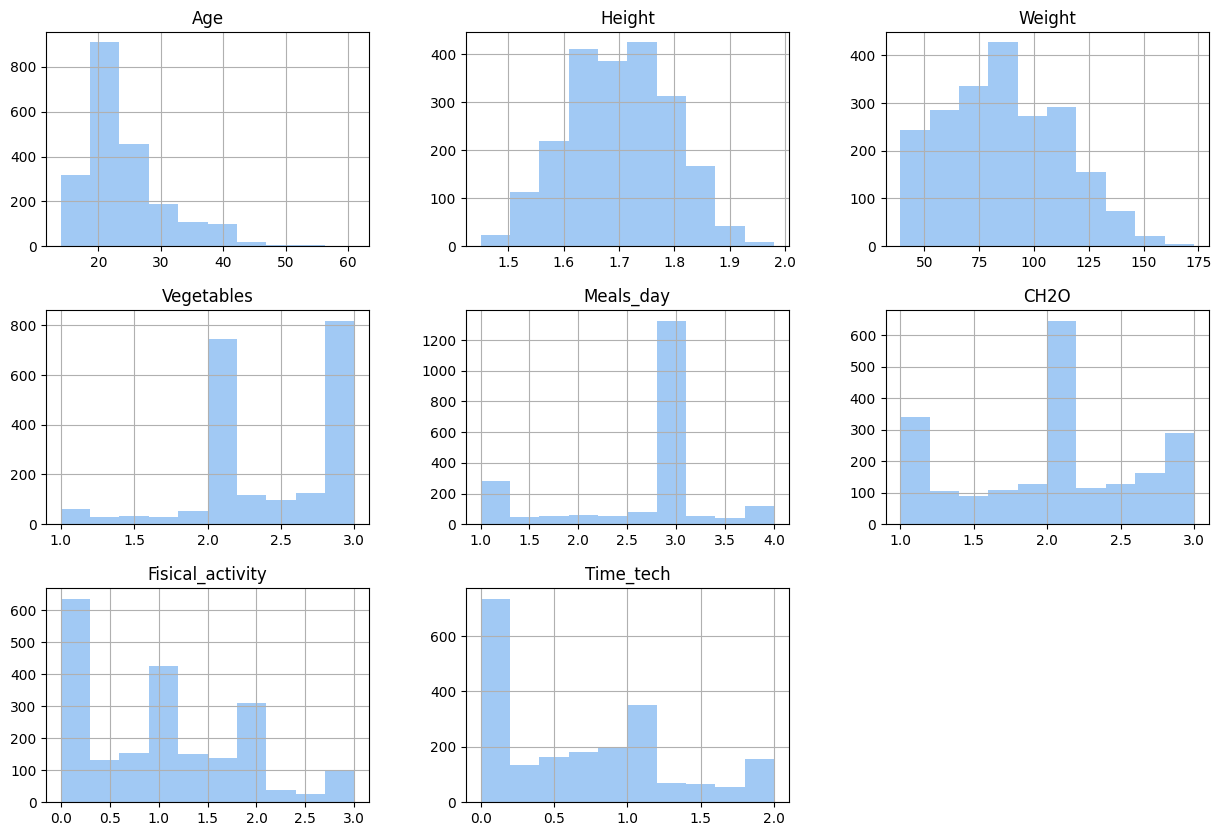

In [141]:
## Visualização dos atributos contínuos
# Histograma
dataset.hist(figsize = ( 15,10))
plt.show()

Como o histograma exibe a distribuição de frequências de uma variável, podemos observar que a maior parte dos indivíduos possui entre 20 e 30 anos, entre 1,60 e 1,80 de altura (este último sendo um histograma simétrico, ou seja, o maior número de dados está localizado no centro do gráfico);

A distribuição das respostas dos indivíduos relacionadas ao consumo diário de vegetais está representada por um histograma bimodal, com dois picos posicionados no 2 e 3. Adicionamente, 3 refeições por dia possui a maior frequência, assim como a resposta "2" para consumo de água por dia, que será considerado como 2 litros;

Quanto ao histograma relacionado a atividades físicas, um atributo pertinente para este estudo, a maior concentração está localizada na resposta "0", ou seja, nenhuma ou muito pouca atividade realizada por dia;

Para finalizar, obtivemos um histograma relacionado a quantidade de horas de uso de tecnologias por dia, com uma alta concentração em alguns minutos e outra grande em mais de uma hora por dia.

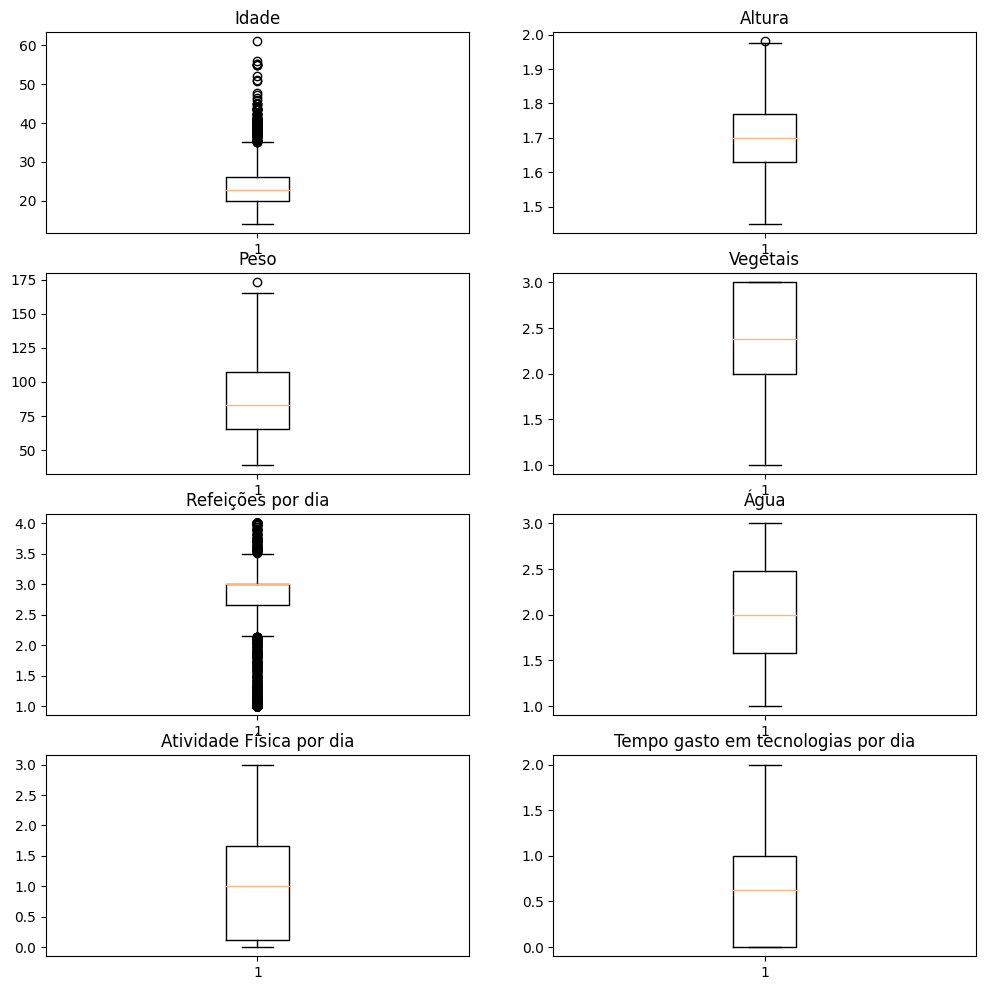

In [142]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(4,2, figsize = (12, 12))

# subplot1: boxplot do comprimento_sepala
ax[0,0].boxplot(dataset['Age'])
ax[0,0].set_title("Idade")

# subplot2: boxplot da largura_sepala
ax[0,1].boxplot(dataset['Height'])
ax[0,1].set_title("Altura")

# subplot3: boxplot da largura_sepala
ax[1,0].boxplot(dataset['Weight'])
ax[1,0].set_title("Peso")

# subplot4: boxplot da largura_sepala
ax[1,1].boxplot(dataset['Vegetables'])
ax[1,1].set_title("Vegetais")

# subplot5: boxplot da largura_sepala
ax[2,0].boxplot(dataset['Meals_day'])
ax[2,0].set_title("Refeições por dia")

# subplot6: boxplot da largura_sepala
ax[2,1].boxplot(dataset['CH2O'])
ax[2,1].set_title("Água")

# subplot7: boxplot do comprimento_petala
ax[3,0].boxplot(dataset['Fisical_activity'])
ax[3,0].set_title("Atividade Física por dia")

# subplot8: boxplot da largura_petala
ax[3,1].boxplot(dataset['Time_tech']);
ax[3,1].set_title("Tempo gasto em tecnologias por dia");

Ao criar os gráficos boxplots, é possível visualizar a distribuição das variáveis contínuas do dataset a partir de suas medianas, quartis, limites e outliers e confirmar o que foi representado logo acima, com os histogramas.

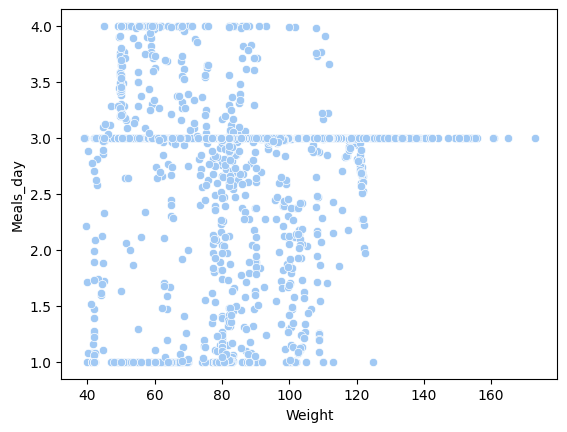

In [143]:
sns.scatterplot(x='Weight', y='Meals_day', data=dataset);

Com o gráfico de dispersão acima, é possível visualizar a distribuição através de pontos que representam os valores das duas variáveis em questão: "Weight" (peso) e "Meals_day" (refeições por dia). Como demostrado nos gráficos anteriores, há uma concentração em 3 refeições ao dia, ou seja, há uma relação linear entre as variáveis, em que os pontos formam uma linha reta.

In [144]:
# A partir das visualizações anteriores, irei selecionar os atributos numéricos que se destacaram para buscar novos insights e buscar compreender as correlações destes com o nosso target. Para isso, irei separar o dataset em 4 diferentes dataframes, de acordo com os níveis de obesidade.

df_ob1 = dataset[dataset["NObeyesdad"] == 'Obesity_Type_I' ]
df_ob2 = dataset[dataset["NObeyesdad"] == 'Obesity_Type_II']
df_ob3 = dataset[dataset["NObeyesdad"] == 'Obesity_Type_III']

In [145]:
df_obesity = pd.concat([df_ob1, df_ob2, df_ob3])

In [146]:
df_ow1 = dataset[dataset["NObeyesdad"]=='Overweight_Level_I']
df_ow2 = dataset[dataset["NObeyesdad"]=='Overweight_Level_II']

In [147]:
df_ow = pd.concat([df_ow1, df_ow2])

In [148]:
df_n = dataset[dataset["NObeyesdad"]=='Normal_Weight']

In [149]:
df_in = dataset[dataset["NObeyesdad"]=='Insufficient_Weight']

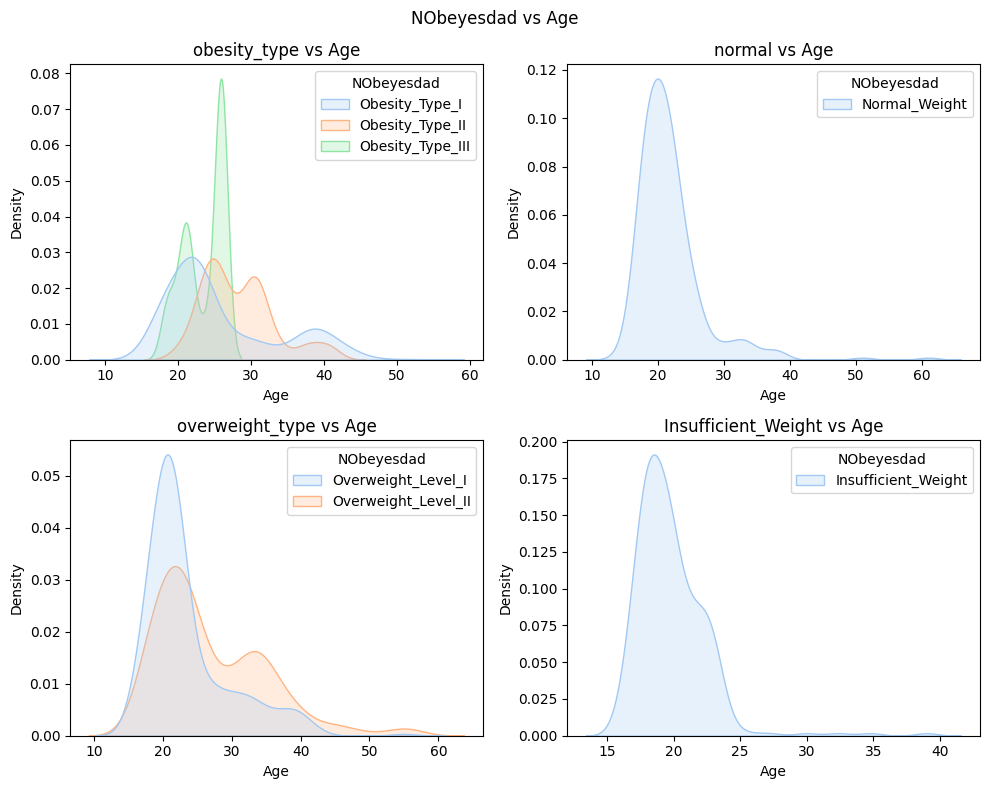

In [150]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Age')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Age')



fig.suptitle('NObeyesdad vs Age')
plt.tight_layout()
plt.show()

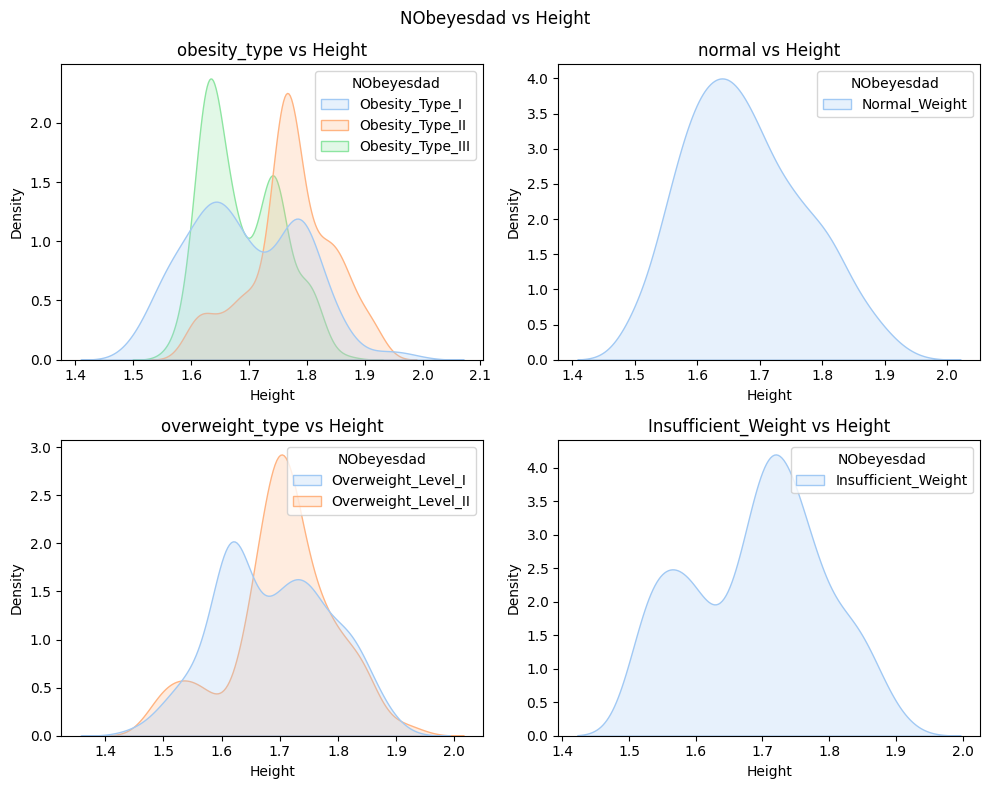

In [151]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Height')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Height')



fig.suptitle('NObeyesdad vs Height')
plt.tight_layout()
plt.show()

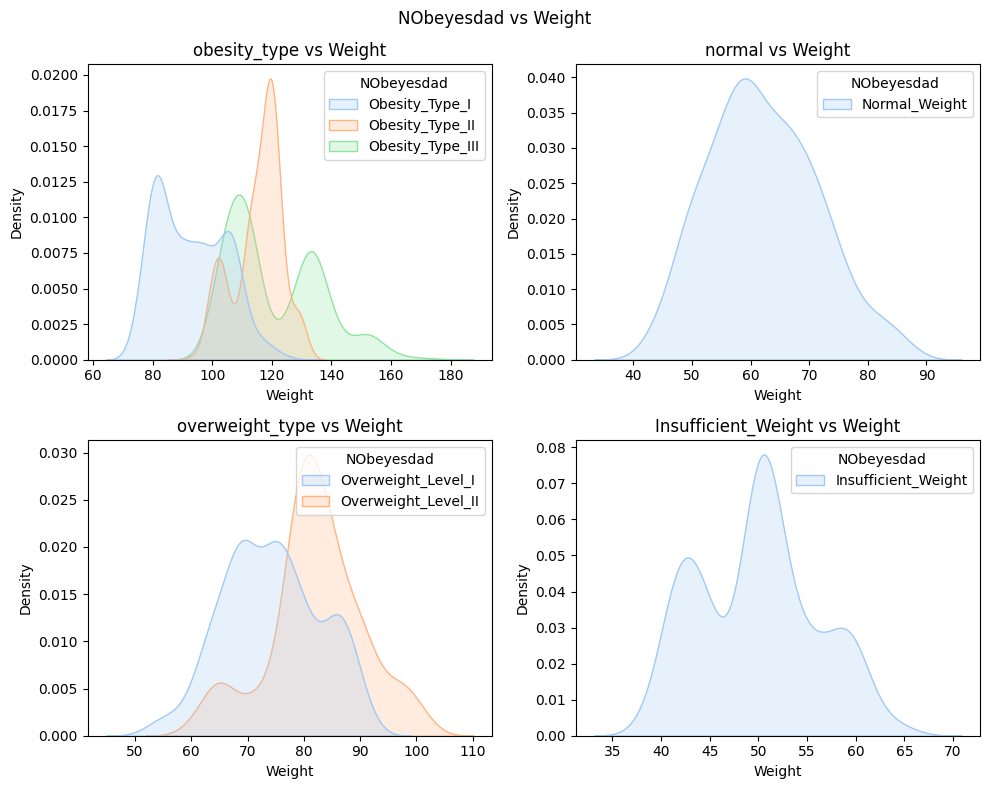

In [152]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Weight')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Weight')



fig.suptitle('NObeyesdad vs Weight')
plt.tight_layout()
plt.show()

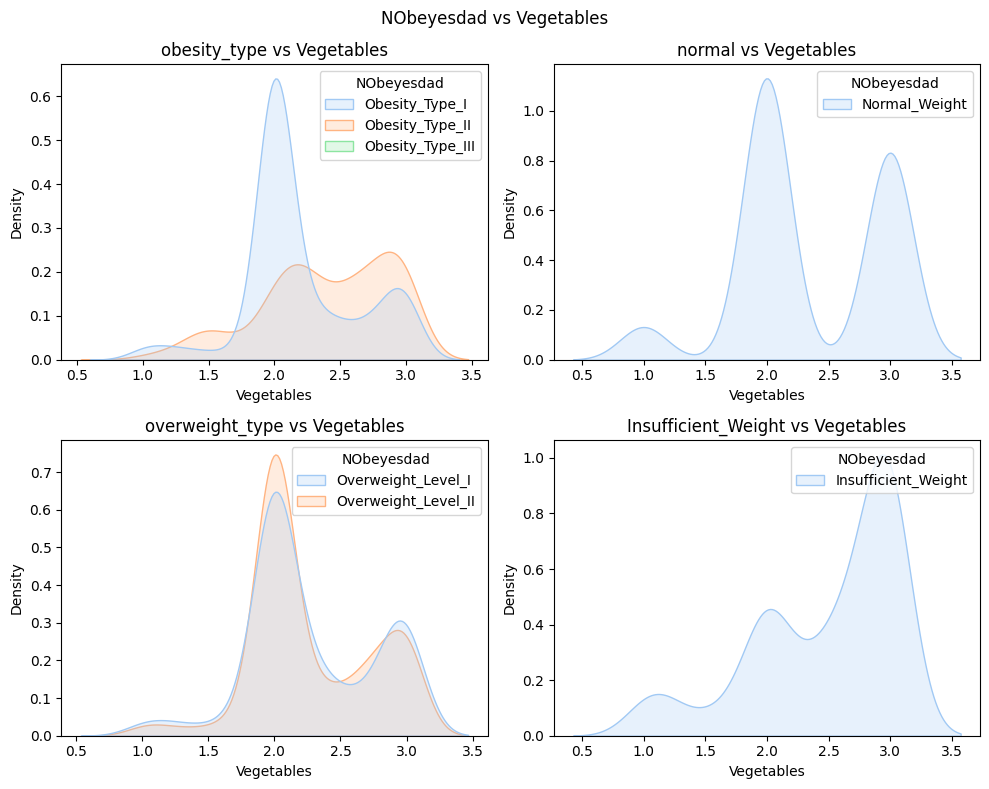

In [153]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Vegetables", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Vegetables')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Vegetables", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Vegetables')



fig.suptitle('NObeyesdad vs Vegetables')
plt.tight_layout()
plt.show()

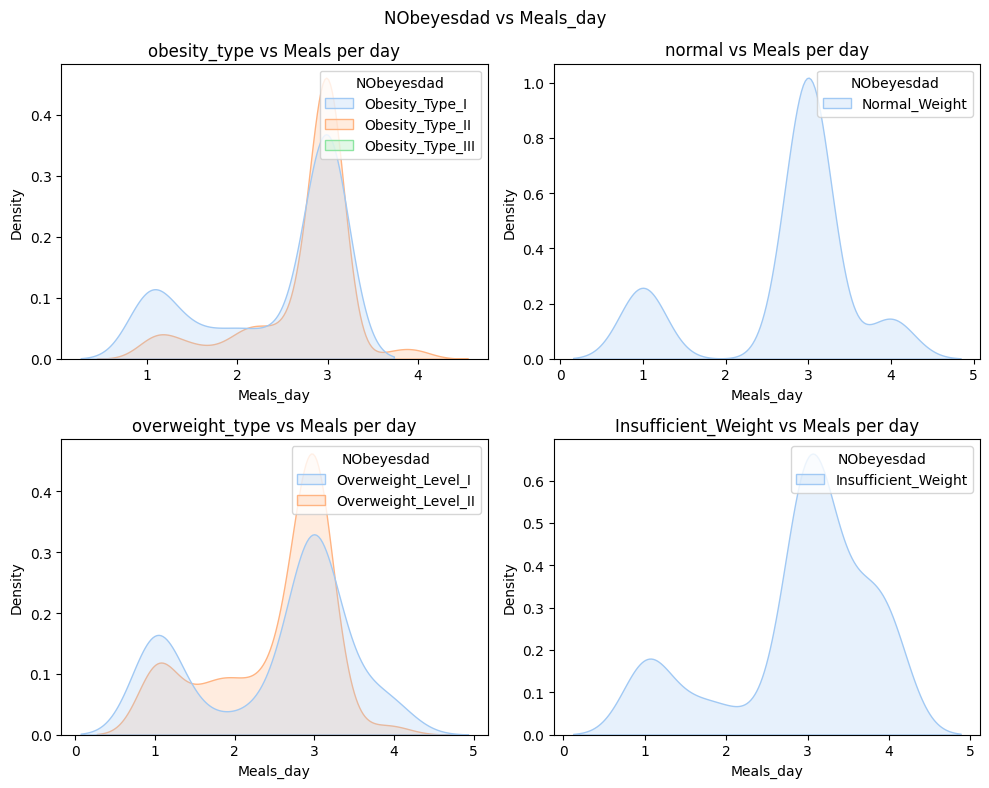

In [154]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Meals_day", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Meals per day')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Meals_day", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Meals per day')



fig.suptitle('NObeyesdad vs Meals_day')
plt.tight_layout()
plt.show()

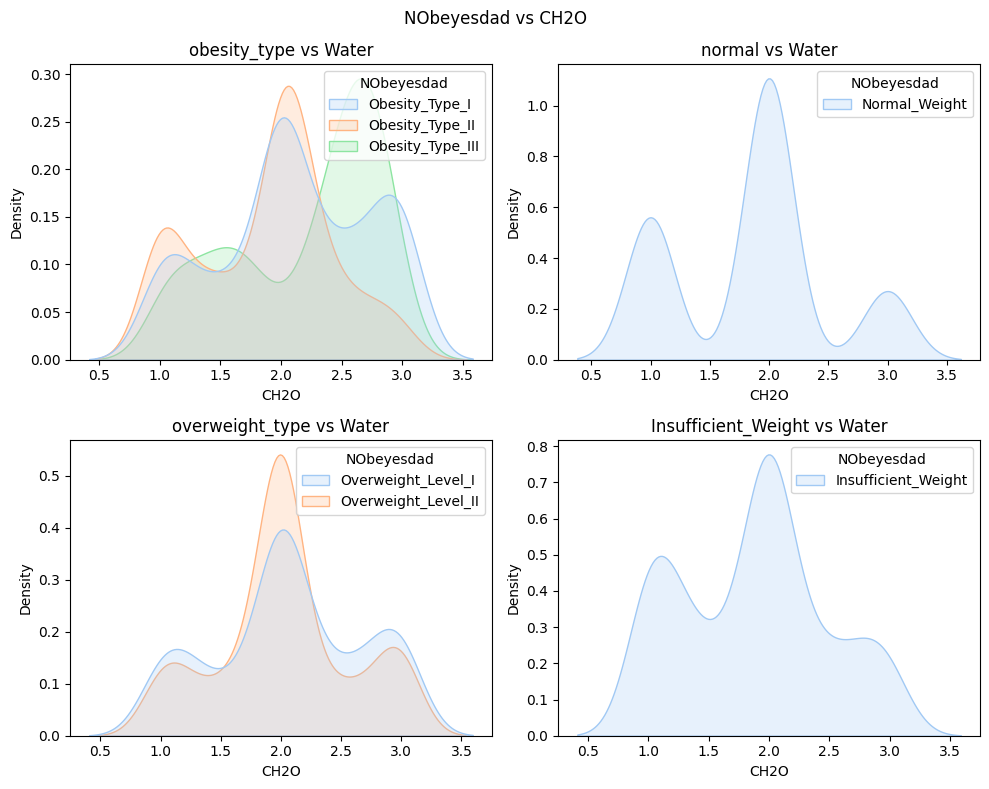

In [155]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Water')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Water')



fig.suptitle('NObeyesdad vs CH2O')
plt.tight_layout()
plt.show()

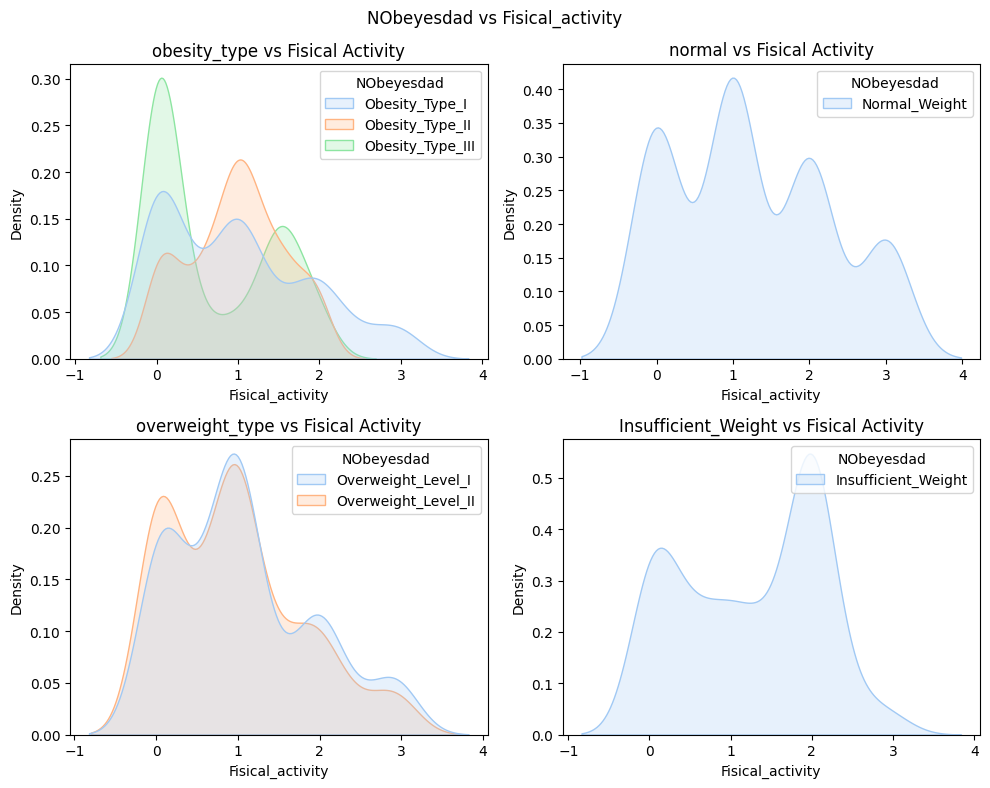

In [156]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Fisical_activity", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Fisical Activity')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Fisical_activity", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Fisical Activity')



fig.suptitle('NObeyesdad vs Fisical_activity')
plt.tight_layout()
plt.show()

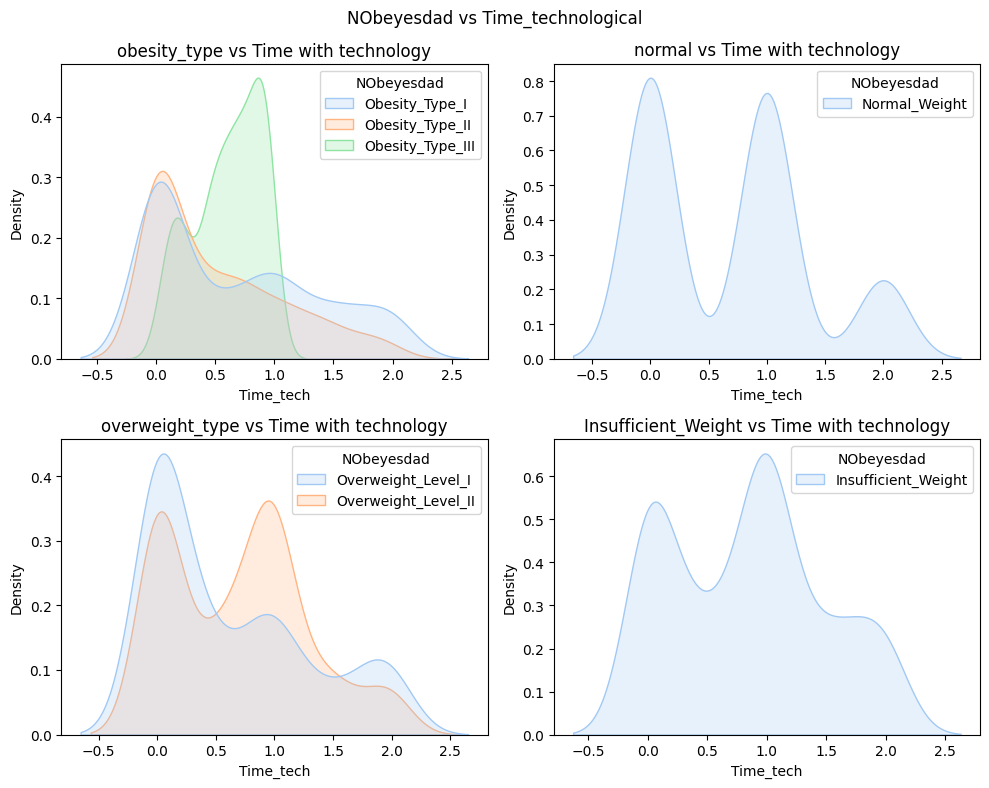

In [157]:
df_list = [df_obesity, df_ow, df_n, df_in]
df_name =["obesity_type", "overweight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=df_list[i], x="Time_tech", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{df_name[i]} vs Time with technology')

    sns.kdeplot(ax = axes[i,1],data=df_list[i+2], x="Time_tech", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{df_name[i+2]} vs Time with technology')



fig.suptitle('NObeyesdad vs Time_technological')
plt.tight_layout()
plt.show()

A partir dos gráficos de densidade acima, podemos visualizar como as variáveis númericas se distribuem de acordo com as classes do atributo 'NObeyesdad'.

É possível verificar alguns destaques entre as os tipos de obesidade, como a quantidade de pessoas com tipo 3 com estaturas menores, quando comparadas aos outros dois tipos. Outro fator relacionado ao tipo 3 é a falta de atividade física, o que é esperado, pela dificuldade de locomoção.

Ao focar no outro extremo, em pessoas com peso insuficiente, podemos constatar que a maioria faz 3 refeições ao dia. As refeições podem não estar nutricionalmente balanceadas, ou esta condição está associada a fatores não relacionados a hábitos alimentares. Ao verificar o gráfico relacionado a tempo com tecnologias, é possível suposicionar a relação com a magreza extrema que as redes sociais estimulam, principamente nas mulheres, que são estão maior número na classe de pessoas abaixo do peso, como visto anteriormente.

In [158]:
dataset_corr = dataset.copy()

In [159]:
# Tranformarei a coluna target em númerica para gerar o gráfico de correlação com as outras variáveis númericas.
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Insufficient_Weight', 'NObeyesdad'] = 2
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Normal_Weight', 'NObeyesdad'] = 3
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 4
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 5
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Obesity_Type_I', 'NObeyesdad'] = 6
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Obesity_Type_II', 'NObeyesdad'] = 7
dataset_corr.loc[dataset_corr['NObeyesdad'] == 'Obesity_Type_III', 'NObeyesdad'] = 8

In [160]:
# Alterando tipo do dado do target para numérico
dataset_corr['NObeyesdad'] = pd.to_numeric(dataset_corr["NObeyesdad"])

In [161]:
corr = dataset_corr.select_dtypes(include='number')

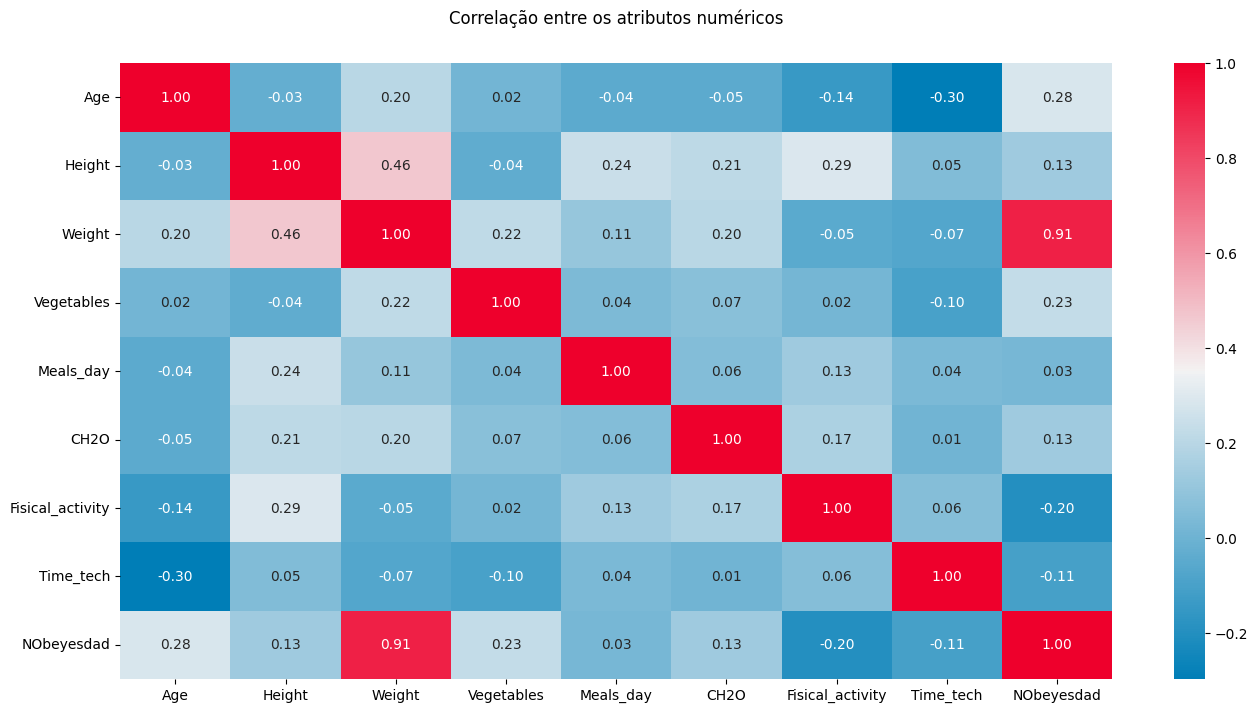

In [162]:
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)

plt.figure(figsize=(16,8))
sns.heatmap(corr.corr(), fmt = ".2f", annot = True, cmap = cmap)
plt.title('Correlação entre os atributos numéricos', y= 1.05)
plt.show()

Como esperado, o atributo de peso possui um coeficiente de correlação alto e positivo com o target. Mas por ser um atributo muito óbvio, talvez seja dispensável para o estudo.

O consumo de vegetais possui uma correlação positiva considerável com o atributo "NObeyesdad", com coeficiente de 0,23, assim como "idade", com 0,28 de coeficiente de correlação.

Adicionalmente, a atividade física possui uma correlação negativa de -0,20 com o target, o que era esperado: pessoas que se exercitam mais, tendem a não ser obesos ou possuir um nível alto de sobrepeso.

## **Pré-processamento de dados**

Para a limpeza de dados, irei apenas remover as linhas duplicadas do dataset, pois manterei os outliers, que são importantes para caracterizar os extremos, e como foi visto anteriormente, não há valores nulos.

In [163]:
dataset.drop_duplicates(inplace=True)

In [164]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Alcohol', 'Caloric_food',
       'Vegetables', 'Meals_day', 'Monitor_calories', 'SMOKE', 'CH2O',
       'family_history_with_overweight', 'Fisical_activity', 'Time_tech',
       'Food_between_meals', 'Transportation', 'NObeyesdad'],
      dtype='object')

In [165]:
# Separando as variáveis de entrada e saída, além de eliminar a coluna de peso, por ser muito redundante para nosso estudo.
X = dataset.drop(columns=['Weight', 'NObeyesdad'])
y = dataset['NObeyesdad']

In [166]:
# Como meu conjunto de dados não é muito complexo e não implementarei modelos de machine learning neste notebook, irei utilizar o LabelEncoder() para transformar dados categóricos em númericos. Selecionei apenas as colunas que possuem 2 classes.
## Apesar de o OneHotEnconder ser mais robusto, acredito que não seja necessário para este estudo.

label_encoder = LabelEncoder()
X["Gender"]=label_encoder.fit_transform(X["Gender"])
X["Monitor_calories"]=label_encoder.fit_transform(X["Monitor_calories"])
X["Caloric_food"]=label_encoder.fit_transform(X["Caloric_food"])
X["SMOKE"]=label_encoder.fit_transform(X["SMOKE"])
X["family_history_with_overweight"]=label_encoder.fit_transform(X["family_history_with_overweight"])
X.head()

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation
0,21.0,0,1.62,no,0,2.0,3.0,0,0,2.0,1,0.0,1.0,Sometimes,Public_Transportation
1,21.0,0,1.52,Sometimes,0,3.0,3.0,1,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation
2,23.0,1,1.80,Frequently,0,2.0,3.0,0,0,2.0,1,2.0,1.0,Sometimes,Public_Transportation
3,27.0,1,1.80,Frequently,0,3.0,3.0,0,0,2.0,0,2.0,0.0,Sometimes,Walking
4,22.0,1,1.78,Sometimes,0,2.0,1.0,0,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation


In [167]:
# Para o atributo "Transportation", que possui 5 classes, o método get_dummies() da biblioteca Pandas foi utilizado. O motivo da escolha está relacionada a simplicicidade, pois ele faz a transformação direta das variáveis categóricas.

X = pd.get_dummies(X, columns=['Transportation'], dtype='int')
X

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation_Automobile,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,21.000000,0,1.620000,no,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,Sometimes,0,0,0,1,0
1,21.000000,0,1.520000,Sometimes,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,Sometimes,0,0,0,1,0
2,23.000000,1,1.800000,Frequently,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,Sometimes,0,0,0,1,0
3,27.000000,1,1.800000,Frequently,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,Sometimes,0,0,0,0,1
4,22.000000,1,1.780000,Sometimes,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,Sometimes,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,Sometimes,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,Sometimes,0,0,0,1,0
2107,21.982942,0,1.748584,Sometimes,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,Sometimes,0,0,0,1,0
2108,22.524036,0,1.752206,Sometimes,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,Sometimes,0,0,0,1,0
2109,24.361936,0,1.739450,Sometimes,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,Sometimes,0,0,0,1,0


In [168]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   2087 non-null   float64
 1   Gender                                2087 non-null   int64  
 2   Height                                2087 non-null   float64
 3   Alcohol                               2087 non-null   object 
 4   Caloric_food                          2087 non-null   int64  
 5   Vegetables                            2087 non-null   float64
 6   Meals_day                             2087 non-null   float64
 7   Monitor_calories                      2087 non-null   int64  
 8   SMOKE                                 2087 non-null   int64  
 9   CH2O                                  2087 non-null   float64
 10  family_history_with_overweight        2087 non-null   int64  
 11  Fisical_activity      

In [169]:
# Agora, irei aplicar o método OrdinalEncoder() nas variáveis categóricas restantes, pois nelas há uma ordem entre as categorias.

X['Alcohol'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [170]:
alcool = ['no', 'Sometimes', 'Frequently', 'Always']

In [171]:
enc = OrdinalEncoder(categories=[alcool])

In [172]:
enc.fit_transform(X[['Alcohol']])

array([[0.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [173]:
X[['Alcohol']] = enc.fit_transform(X[['Alcohol']])
X.head()

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation_Automobile,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,21.0,0,1.62,0.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,Sometimes,0,0,0,1,0
1,21.0,0,1.52,1.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,Sometimes,0,0,0,1,0
2,23.0,1,1.80,2.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,Sometimes,0,0,0,1,0
3,27.0,1,1.80,2.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,Sometimes,0,0,0,0,1
4,22.0,1,1.78,1.0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,Sometimes,0,0,0,1,0


Foi possível verificar que 0 siginifica "no" para consumo de álcool, assim como 1 caracteriza "Sometimes".

In [174]:
X['Food_between_meals'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [175]:
lanche_entreref = ['no', 'Sometimes', 'Frequently', 'Always']

In [176]:
enc_2 = OrdinalEncoder(categories=[lanche_entreref])

In [177]:
X[['Food_between_meals']] = enc_2.fit_transform(X[['Food_between_meals']])
X.head()

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation_Automobile,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,21.0,0,1.62,0.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,1.0,0,0,0,1,0
1,21.0,0,1.52,1.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1.0,0,0,0,1,0
2,23.0,1,1.80,2.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1.0,0,0,0,1,0
3,27.0,1,1.80,2.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1.0,0,0,0,0,1
4,22.0,1,1.78,1.0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1.0,0,0,0,1,0


In [178]:
## Realizarei a normalização para os dados numéricos, de forma a redimensioná-los para o intervalo de 0 a 1.
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
X[['Age', 'Height', 'Vegetables', 'Meals_day', 'CH2O', 'Fisical_activity', 'Time_tech']] = scaler.fit_transform(X[['Age', 'Height','Vegetables', 'Meals_day', 'CH2O', 'Fisical_activity', 'Time_tech']])

In [179]:
X.head()

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation_Automobile,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,0.148936,0,0.320755,0.0,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,1.0,0,0,0,1,0
1,0.148936,0,0.132075,1.0,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,1.0,0,0,0,1,0
2,0.191489,1,0.660377,2.0,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,1.0,0,0,0,1,0
3,0.276596,1,0.660377,2.0,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,1.0,0,0,0,0,1
4,0.170213,1,0.622642,1.0,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,1.0,0,0,0,1,0


In [180]:
y_corr = y.copy()

In [181]:
# Utilizarei a mesma técnica "manual" realizada anteriormente, apenas para transformar a coluna target em númerica para gerar o gráfico de correlação com as variáveis numéricas e categóricas.
y_corr = y_corr.replace("Insufficient_Weight", 2)
y_corr = y_corr.replace("Normal_Weight", 3)
y_corr = y_corr.replace("Overweight_Level_I", 4)
y_corr = y_corr.replace("Overweight_Level_II", 5)
y_corr = y_corr.replace("Obesity_Type_I", 6)
y_corr = y_corr.replace("Obesity_Type_II", 7)
y_corr = y_corr.replace("Obesity_Type_III", 8)

In [182]:
y_corr = y_corr.astype(int)

In [183]:
y_corr.info()

<class 'pandas.core.series.Series'>
Index: 2087 entries, 0 to 2110
Series name: NObeyesdad
Non-Null Count  Dtype
--------------  -----
2087 non-null   int64
dtypes: int64(1)
memory usage: 32.6 KB


In [184]:
xy_corr = pd.concat([X, y_corr], axis = 1)

In [185]:
xy_corr.head()

,Age,Gender,Height,Alcohol,Caloric_food,Vegetables,Meals_day,Monitor_calories,SMOKE,CH2O,family_history_with_overweight,Fisical_activity,Time_tech,Food_between_meals,Transportation_Automobile,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking,NObeyesdad
0,0.148936,0,0.320755,0.0,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,1.0,0,0,0,1,0,3
1,0.148936,0,0.132075,1.0,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,1.0,0,0,0,1,0,3
2,0.191489,1,0.660377,2.0,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,1.0,0,0,0,1,0,3
3,0.276596,1,0.660377,2.0,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,1.0,0,0,0,0,1,4
4,0.170213,1,0.622642,1.0,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,1.0,0,0,0,1,0,5


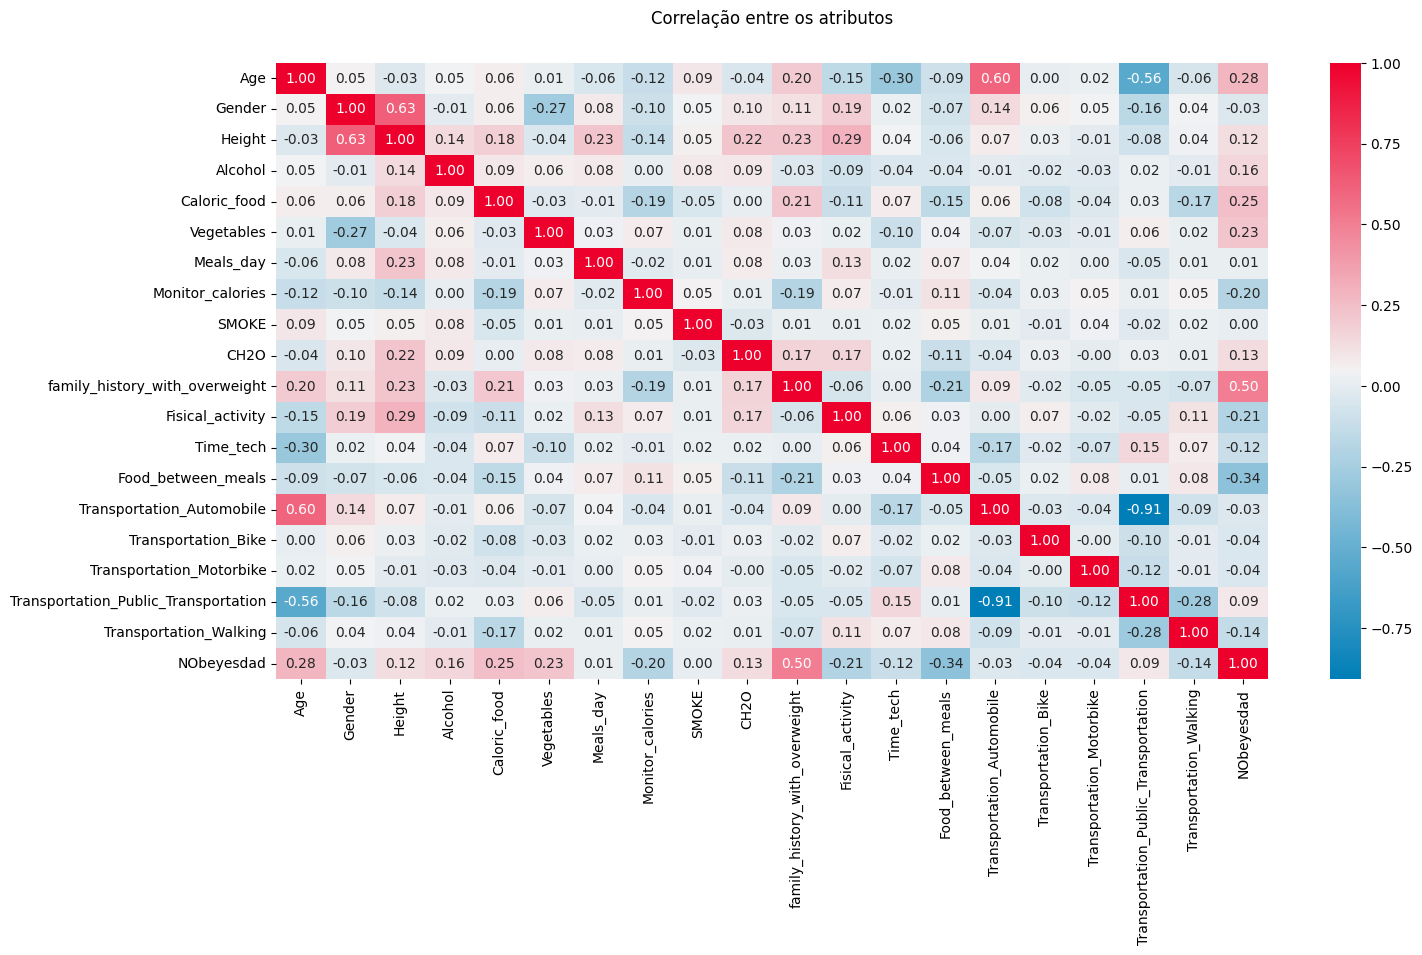

In [186]:
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)

plt.figure(figsize=(16,8))
sns.heatmap(xy_corr.corr(), fmt = ".2f", annot = True, cmap = cmap)
plt.title('Correlação entre os atributos', y= 1.05)
plt.show()

Após realizar os encodings nas variáveis categóricas e transformar o target em númerico apenas para esta visualização, é possível verificar os coeficientes de relação de todos os atributos com "NObeyesdad".

Conforme esperado e destacado durante este estudo, há uma alta correlação positiva entre o tipo de peso e se há ou não histórico de sobrepeso na família. A idade também se destaca com uma correlação positiva de 0.28 com o tipo de peso, ou seja, se o a idade aumenta, o peso também aumenta. Para finalizar as correlações positivas que se sobressaíram, pessoas que comem comida calórica frequentemente tendem a ter mais peso, assim como quem come mais vegetais. Este último, por ser um hábito alimentar saudável e, teoricamente, pouco calórico, talvez não faça tanto sentido para o estudo.

Quanto às correlações negativas, foi evidenciado que quem mais come entre as refeições, menor é seu peso, como já foi visto anteriormente, o que pode ser estranho, mas pessoas com peso insuficiente, por exemplo, podem ter transtornos alimentares e se alimentar de forma muito irregular. Por este motivo, irei manter esta coluna. Para finalizar, pessoas que fazem mais atividades físicas possuem menor peso, assim como quem monitora calorias diariamente.

In [187]:
# Excluindo coluna de consumo de vegetais, pois, como visto acima, ela pode não fazer muito sentido para o estudo.
X = X.drop('Vegetables', axis = 'columns')

In [188]:
# O próximo passo seria realizar a divisão entre treino e teste, mas não é o foco do presente estudo.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finalizo agora, esta análise, com as variáveis independentes no dataframe "X" e o target, como "y". Feito isto, o próximo passo seria separá-las através da função train_test_split, de forma a treinar um modelo para que aprenda padrões presentes nos dados.

A partir das análises exploratórias, que geraram insights, como a forte dependência do tipo de peso em relação ao histórico de obesidade na família, ou a inesperada correlação relativamente forte e negativa entre "NObeyesdad" e "Food_between_meals", e do pré-processamento de dados, momento de transformações, como a normalização, e até mesmo exclusão de colunas, como resultado das visualizações realizadas, concluo este MVP, sentindo mais confiança e anseio em desenvolver estudos com base de dados mais complexas e um enorme interesse em ampliar meu conhecimento em análise e ciência de dados.